# Лабораторная работа №7. Введение в работу с данными

## Повторение примеров

### 7.2.1. Julia для науки о данных

В Julia для обработки данных используются наработки из других языков программирования, в частности, из R и Python.

#### 7.2.1.1. Считывание данных

Довольно часто данные для обработки содержаться в csv-файле, имеющим текстовый
формат, в котором данные в строке разделены, например, запятыми, и соответствуют
ячейкам таблицы, а строки данных соответствуют строкам таблицы. Также данные могут
быть представлены в виде фреймов или множеств.

В Julia для работы с такого рода структурами данных используют пакеты CSV,
DataFrames, RDatasets, FileIO:

In [1]:
# Обновление окружения:
using Pkg
Pkg.update

up (generic function with 7 methods)

In [2]:
# Установка пакетов:
using Pkg
for p in ["CSV", "DataFrames", "RDatasets", "FileIO"]
Pkg.add(p)
end

    Updating registry at `C:\Users\User\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [3]:
using CSV, DataFrames, DelimitedFiles

In [4]:
# Считывание данных и их запись в структуру:
P = CSV.File("programminglanguages.csv") |> DataFrame

Row,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [5]:
# Функция определения по названию языка программирования года его создания:
function language_created_year(P,language::String)
    loc = findfirst(P[:,2].==language)
    return P[loc,1]
end

language_created_year (generic function with 1 method)

In [6]:
# Пример вызова функции и определение даты создания языка Python:
language_created_year(P,"Python")

1991

In [7]:
# Пример вызова функции и определение даты создания языка Julia:
language_created_year(P,"Julia")

2012

In [8]:
language_created_year(P,"julia")

LoadError: MethodError: no method matching getindex(::DataFrame, ::Nothing, ::Int64)
[0mClosest candidates are:
[0m  getindex(::DataFrame, [91m::typeof(!)[39m, ::Union{Signed, Unsigned}) at C:\Users\User\.julia\packages\DataFrames\58MUJ\src\dataframe\dataframe.jl:548
[0m  getindex(::DataFrame, [91m::Colon[39m, ::Union{AbstractString, Signed, Symbol, Unsigned}) at C:\Users\User\.julia\packages\DataFrames\58MUJ\src\dataframe\dataframe.jl:542
[0m  getindex(::DataFrame, [91m::InvertedIndex[39m, ::Union{AbstractString, Signed, Symbol, Unsigned}) at C:\Users\User\.julia\packages\DataFrames\58MUJ\src\dataframe\dataframe.jl:538
[0m  ...

In [9]:
# Функция определения по названию языка программирования
# года его создания (без учёта регистра):
function language_created_year_v2(P,language::String)
    loc = findfirst(lowercase.(P[:,2]).==lowercase.(language))
    return P[loc,1]
end

language_created_year_v2 (generic function with 1 method)

In [10]:
# Пример вызова функции и определение даты создания языка julia:
language_created_year_v2(P,"julia")

2012

In [11]:
# Построчное считывание данных с указанием разделителя:
Tx = readdlm("programminglanguages.csv", ',')

74×2 Matrix{Any}:
     "year"  "language"
 1951        "Regional Assembly Language"
 1952        "Autocode"
 1954        "IPL"
 1955        "FLOW-MATIC"
 1957        "FORTRAN"
 1957        "COMTRAN"
 1958        "LISP"
 1958        "ALGOL 58"
 1959        "FACT"
 1959        "COBOL"
 1959        "RPG"
 1962        "APL"
    ⋮        
 2003        "Scala"
 2005        "F#"
 2006        "PowerShell"
 2007        "Clojure"
 2009        "Go"
 2010        "Rust"
 2011        "Dart"
 2011        "Kotlin"
 2011        "Red"
 2011        "Elixir"
 2012        "Julia"
 2014        "Swift"

#### 7.2.1.2. Запись данных в файл

Предположим, что требуется записать имеющиеся данные в файл. Для записи данных
в формате CSV можно воспользоваться следующим вызовом:

In [12]:
# Запись данных в CSV-файл:
CSV.write("programming_languages_data2.csv", P)

"programming_languages_data2.csv"

Можно задать тип файла и разделитель данных:

In [13]:
# Пример записи данных в текстовый файл с разделителем ',':
writedlm("programming_languages_data.txt", Tx, ',')

In [14]:
# Пример записи данных в текстовый файл с разделителем '-':
writedlm("programming_languages_data2.txt", Tx, '-')

Можно проверить, используя readdlm, корректность считывания созданного текстового файла:

In [15]:
# Построчное считывание данных с указанием разделителя:
P_new_delim = readdlm("programming_languages_data2.txt", '-')

74×2 Matrix{Any}:
     "year"  "language"
 1951        "Regional Assembly Language"
 1952        "Autocode"
 1954        "IPL"
 1955        "FLOW-MATIC"
 1957        "FORTRAN"
 1957        "COMTRAN"
 1958        "LISP"
 1958        "ALGOL 58"
 1959        "FACT"
 1959        "COBOL"
 1959        "RPG"
 1962        "APL"
    ⋮        
 2003        "Scala"
 2005        "F#"
 2006        "PowerShell"
 2007        "Clojure"
 2009        "Go"
 2010        "Rust"
 2011        "Dart"
 2011        "Kotlin"
 2011        "Red"
 2011        "Elixir"
 2012        "Julia"
 2014        "Swift"

#### 7.2.1.3. Словари

При инициализации словаря можно задать конкретные типы данных для ключей
и значений:

In [16]:
# Инициализация словаря:
dict = Dict{Integer,Vector{String}}()

Dict{Integer, Vector{String}}()

а можно инициировать пустой словарь, не задавая строго структуру:

In [17]:
# Инициализация словаря:
dict2 = Dict()

Dict{Any, Any}()

Далее требуется заполнить словарь ключами и годами, которые содержат все языки
программирования, созданные в каждом году, в качестве значений:

In [18]:
# Заполнение словаря данными:
for i = 1:size(P,1)
    year,lang = P[i,:]
    if year in keys(dict)
        dict[year] = push!(dict[year],lang)
    else
        dict[year] = [lang]
    end
end

В результате при вызове словаря можно, выбрав любой год, узнать, какие языки программирования были созданы в этом году:

In [19]:
# Пример определения в словаре языков программирования, созданных в 2003 году:
dict[2011]

4-element Vector{String}:
 "Dart"
 "Kotlin"
 "Red"
 "Elixir"

#### 7.2.1.4. DataFrames

Работа с данными, записанными в структуре DataFrame, позволяет использовать индексацию и получить доступ к столбцам по заданному имени заголовка или по индексу
столбца

На примере с данными о языках программирования и годах их создания зададим
структуру DataFrame:

In [20]:
# Подгружаем пакет DataFrames:
using DataFrames

In [21]:
# Задаём переменную со структурой DataFrame:
df = DataFrame(year = P[:,1], language = P[:,2])

Row,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


Если требуется получить доступ к столбцам по имени заголовка, то необходимо добавить к имени заголовка двоеточие:

In [22]:
# Вывод всех значения столбца year:
df[!,:year]

73-element Vector{Int64}:
 1951
 1952
 1954
 1955
 1957
 1957
 1958
 1958
 1959
 1959
 1959
 1962
 1962
    ⋮
 2003
 2005
 2006
 2007
 2009
 2010
 2011
 2011
 2011
 2011
 2012
 2014

Пакет DataFrames предоставляет возможность с помощью description получить основные статистические сведения о каждом столбце во фрейме данных:

In [23]:
# Получение статистических сведений о фрейме:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,year,1982.99,1951,1986.0,2014,0,Int64
2,language,,ALGOL 58,,dBase III,0,String31


#### 7.2.1.5. RDatasets

С данными можно работать также как с наборами данных через пакет RDatasets
языка R:

In [24]:
# Подгружаем пакет RDatasets:
using RDatasets

In [25]:
# Задаём структуру данных в виде набора данных:
iris = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


В данном случает набор данных содержит сведения о цветах. При этом следует иметь
в виду, что данные, загруженные с помощью набора данных, хранятся в виде DataFrame:

In [26]:
# Определения типа переменной:
typeof(iris)

DataFrame

Пакет RDatasets также предоставляет возможность с помощью description получить
основные статистические сведения о каждом столбце в наборе данных:

In [27]:
describe(iris)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


#### 7.2.1.6. Работа с переменными отсутствующего типа (Missing Values)


Пакет DataFrames позволяет использовать так называемый «отсутствующий» тип:

In [28]:
# Отсутствующий тип:
a = missing

missing

In [29]:
typeof(a)

Missing

В операции сложения числа и переменной с отсутствующим типом значение также
будет иметь отсутствующий тип:

In [30]:
# Пример операции с переменной отсутствующего типа:
a + 1

missing

Приведём пример работы с данными, среди которых есть данные с отсутствующим
типом.
Предположим есть перечень продуктов, для которых заданы калории:

In [31]:
# Определение перечня продуктов:
foods = ["apple", "cucumber", "tomato", "banana"]

4-element Vector{String}:
 "apple"
 "cucumber"
 "tomato"
 "banana"

In [32]:
# Определение калорий:
calories = [missing,47,22,105]

4-element Vector{Union{Missing, Int64}}:
    missing
  47
  22
 105

В массиве значений калорий есть значение с отсутствующим типом:

In [33]:
# Определение типа переменной:
typeof(calories)

Vector{Union{Missing, Int64}} (alias for Array{Union{Missing, Int64}, 1})

При попытке получить среднее значение калорий, ничего не получится из-за наличия
переменной с отсутствующим типом:

In [34]:
# Подключаем пакет Statistics:
using Statistics

In [35]:
# Определение среднего значения:
mean(calories)

missing

Для решения этой проблемы необходимо игнорировать отсутствующий тип:

In [36]:
# Определение среднего значения без значений с отсутствующим типом:
mean(skipmissing(calories))

58.0

Далее показано, как можно сформировать таблицы данных и объединить их в один
фрейм:

In [37]:
# Задание сведений о ценах:
prices = [0.85,1.6,0.8,0.6]

4-element Vector{Float64}:
 0.85
 1.6
 0.8
 0.6

In [38]:
# Формирование данных о калориях:
dataframe_calories = DataFrame(item=foods,calories=calories)

Row,item,calories
,String,Int64?
1,apple,missing
2,cucumber,47
3,tomato,22
4,banana,105


In [39]:
# Формирование данных о ценах:
dataframe_prices = DataFrame(item=foods,price=prices)

Row,item,price
,String,Float64
1,apple,0.85
2,cucumber,1.6
3,tomato,0.8
4,banana,0.6


In [40]:
# Объединение данных о калориях и ценах:
DF = innerjoin(dataframe_calories,dataframe_prices,on=:item)

Row,item,calories,price
,String,Int64?,Float64
1,apple,missing,0.85
2,cucumber,47,1.6
3,tomato,22,0.8
4,banana,105,0.6


#### 7.2.1.7. FileIO

В Julia можно работать с так называемыми «сырыми» данными, используя пакет
FileIO:

In [41]:
# Подключаем пакет FileIO:
using FileIO

Попробуем посмотреть, как Julia работает с изображениями.

Подключим соответствующий пакет:

In [42]:
# Подключаем пакет ImageIO:
import Pkg
Pkg.add("ImageIO")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


Загрузим изображение (в данном случае логотип Julia):

In [43]:
# Загрузка изображения:
X1 = load("Julialogo.png")

200×320 Array{RGBA{N0f8},2} with eltype ColorTypes.RGBA{FixedPointNumbers.N0f8}:
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)  …  RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 ⋮                            ⋱  
 RGBA{N0f8}(0.0,0.0,0.0,0.0)     RGBA{N0f8}(0.0,0.0,0.0,0.0)
 RGBA{N0f8}(0.0,0.0,0.0,0.0)   

Julia хранит изображение в виде множества цветов:

In [44]:
# Определение типа и размера данных:
@show typeof(X1);
@show size(X1);

typeof(X1) = Matrix{ColorTypes.RGBA{FixedPointNumbers.N0f8}}
size(X1) = (200, 320)


### 7.2.2. Обработка данных: стандартные алгоритмы машинного обучения в Julia

#### 7.2.2.1. Кластеризация данных. Метод k-средних

Задача кластеризации данных заключается в формировании однородной группы упорядоченных по какому-то признаку данных.

Метод k-средних позволяет минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:
$$
V = \sum_{i=1}^{k} \sum_{x \in S_i} (x - \mu_i)^2,
$$
где $𝑆_𝑖$, $𝑖 = 1, 2, \dots, 𝑘$ - полученные кластеры, $k$ - число кластеров, $\mu_𝑖$ - центры масс (главные точки или объекты кластера) всех векторов $x$ из кластера $S_i$.

Рассмотрим задачу кластеризации данных на примере данных о недвижимости. Файл
с данными houses.csv содержит список транзакций с недвижимостью в районе Сакраменто, о которых было сообщено в течение определённого числа дней.

Сначала подключим необходимые для работы пакеты:

In [45]:
# Загрузка пакетов:
import Pkg
Pkg.add("DataFrames")
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [46]:
using DataFrames
using CSV

In [47]:
import Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


Затем загрузим данные:

In [48]:
# Загрузка данных:
houses = CSV.File("houses.csv") |> DataFrame

Row,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
,String,String15,Int64,String3,Int64,Int64,Int64,String15,String31,Int64,Float64,Float64
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.6319,-121.435
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.4789,-121.431
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.6183,-121.444
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.6168,-121.439
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.5195,-121.436
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.6626,-121.328
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.6817,-121.352
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.5351,-121.481
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.6212,-121.271


Построим график цен на недвижимость в зависимости от площади:

In [49]:
# Построение графика:
using Plots

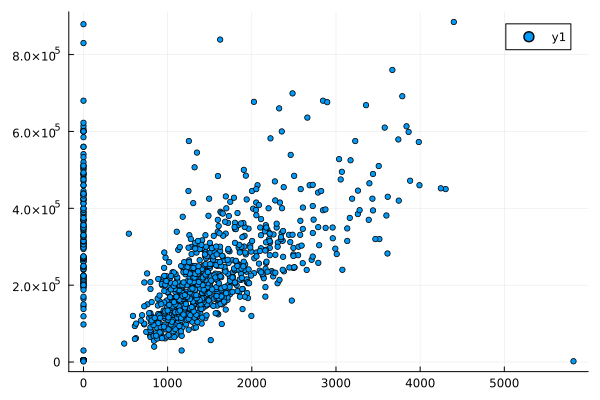

In [50]:
plot(size=(500,500),leg=false)
x = houses[!,:sq__ft]
y = houses[!,:price]
scatter(x,y,markersize=3)

Как видно из графика, имеются так называемые «артефакты», т.е. проявляются отсутствующие или невозможные сведения в исходных данных, например, цены на
недвижимость нулевой площади.

Для того чтобы избавиться от такого эффекта, можно отфильтровать и исключить такие
значения, получить более корректный график цен:


In [51]:
# Фильтрация данных по заданному условию:
filter_houses = houses[houses[!,:sq__ft].>0,:]

Row,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
,String,String15,Int64,String3,Int64,Int64,Int64,String15,String31,Int64,Float64,Float64
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.6319,-121.435
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.4789,-121.431
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.6183,-121.444
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.6168,-121.439
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.5195,-121.436
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.6626,-121.328
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.6817,-121.352
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.5351,-121.481
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.6212,-121.271


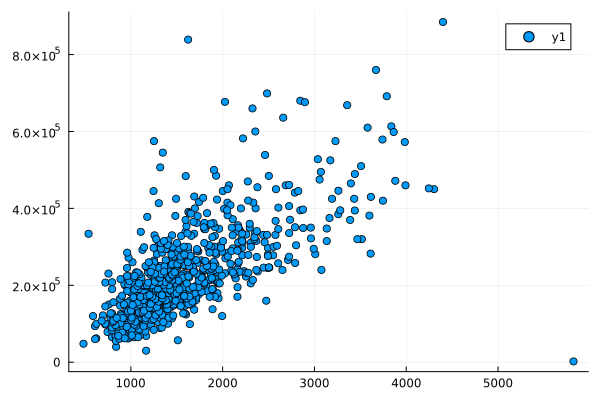

In [52]:
# Построение графика:
x = filter_houses[!,:sq__ft]
y = filter_houses[!,:price]
scatter(x,y)

Используя для фильтрации значений функцию by пакета DataFrames и для вычисления
среднего значения функцию mean пакета Statistics, можно посмотреть среднюю цену
домов определённого типа:

In [53]:
# Подключение пакета Statistics:
using Statistics

In [54]:
# Определение средней цены для определённого типа домов:
combine(groupby(filter_houses,:type),filter_houses->mean(filter_houses[!,:price]))

Row,type,x1
,String15,Float64
1,Residential,2.34802e5
2,Condo,1.34213e5
3,Multi-Family,2.24535e5


Отфильтровав таким образом данные, можно приступить к формированию кластеров.

Сначала подключаем необходимые пакеты и формируем данные в нужном виде:

In [55]:
# Подключение пакета Clustering:
import Pkg
Pkg.add("Clustering")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [56]:
using Clustering

In [57]:
# Добавление данных :latitude и :longitude в новый фрейм:
X = filter_houses[!, [:latitude, :longitude]]

Row,latitude,longitude
,Float64,Float64
1,38.6319,-121.435
2,38.4789,-121.431
3,38.6183,-121.444
4,38.6168,-121.439
5,38.5195,-121.436
6,38.6626,-121.328
7,38.6817,-121.352
8,38.5351,-121.481
9,38.6212,-121.271


In [58]:
# Конвертация данных в матричный вид:
X = convert(Matrix{Float64}, X)

LoadError: MethodError: [0mCannot `convert` an object of type [92mDataFrame[39m[0m to an object of type [91mMatrix{Float64}[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::LinearAlgebra.Factorization[39m) where T<:AbstractArray at C:\Users\User\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\factorization.jl:58
[0m  convert(::Type{Array{T, N}}, [91m::StaticArraysCore.SizedArray{S, T, N, N, Array{T, N}}[39m) where {S, T, N} at C:\Users\User\.julia\packages\StaticArrays\yXGNL\src\SizedArray.jl:88
[0m  convert(::Type{Array{T, N}}, [91m::StaticArraysCore.SizedArray{S, T, N, M, TData} where {M, TData<:AbstractArray{T, M}}[39m) where {T, S, N} at C:\Users\User\.julia\packages\StaticArrays\yXGNL\src\SizedArray.jl:82
[0m  ...

In [59]:
X = hcat(X[!, :latitude], X[!, :longitude])

814×2 Matrix{Float64}:
 38.6319  -121.435
 38.4789  -121.431
 38.6183  -121.444
 38.6168  -121.439
 38.5195  -121.436
 38.6626  -121.328
 38.6817  -121.352
 38.5351  -121.481
 38.6212  -121.271
 38.7009  -121.443
 38.6377  -121.452
 38.4707  -121.459
 38.6187  -121.436
  ⋮       
 38.7035  -121.375
 38.7031  -121.235
 38.3898  -121.446
 38.8978  -121.325
 38.4679  -121.445
 38.4453  -121.442
 38.4174  -121.484
 38.4577  -121.36
 38.4999  -121.459
 38.7088  -121.257
 38.417   -121.397
 38.6552  -121.076

Каждая функция хранится в виде строки X, но можно транспонировать получившуюся
матрицу, чтобы иметь возможность работать с столбцами данных X:

In [60]:
# Транспонирование матрицы с данными:
X = X'

2×814 adjoint(::Matrix{Float64}) with eltype Float64:
   38.6319    38.4789    38.6183  …    38.7088    38.417    38.6552
 -121.435   -121.431   -121.444      -121.257   -121.397  -121.076

В качестве критерия для формирования кластеров данных и определения количества
кластеров попробуем использовать количество почтовых индексов:

In [61]:
# Задание количества кластеров:
k = length(unique(filter_houses[!,:zip]))

66

Для определения k-среднего можно воспользоваться соответствующей функцией пакета Statistics:

In [62]:
# Определение k-среднего:
C = kmeans(X,k)

KmeansResult{Matrix{Float64}, Float64, Int64}([38.49993154545455 38.811719 … 38.48196429166668 38.42476926666667; -121.529604 -121.21894424999999 … -121.455342375 -121.44219453333335], [53, 30, 53, 53, 49, 47, 27, 54, 29, 37  …  40, 23, 30, 15, 43, 22, 65, 38, 48, 25], [7.94223669799976e-5, 0.00024389903410337865, 5.594935646513477e-5, 5.1569219067459926e-5, 0.00015539828018518165, 9.944444900611416e-5, 0.0002968227199744433, 0.00026751534824143164, 3.118247332167812e-5, 3.0433900974458084e-5  …  5.784670793218538e-5, 5.2413251978578046e-5, 0.00015726659330539405, 0.00020393780141603202, 3.1363630114356056e-5, 6.927978756721132e-5, 0.00033402422559447587, 0.0005266233965812717, 0.0003265923005528748, 7.06132996128872e-5], [11, 4, 13, 17, 15, 11, 7, 16, 3, 2  …  31, 19, 1, 3, 3, 15, 20, 6, 24, 15], [11, 4, 13, 17, 15, 11, 7, 16, 3, 2  …  31, 19, 1, 3, 3, 15, 20, 6, 24, 15], 0.20661036533056176, 12, true)

Далее сформируем новый фрейм, включающий исходные данные о недвижимости
и столбец с данными о назначенном каждому дому кластере:

In [63]:
# Формирование фрейма данных:
df = DataFrame(cluster = C.assignments, city = filter_houses[!,:city], 
    latitude = filter_houses[!,:latitude],
    longitude = filter_houses[!,:longitude],
    zip = filter_houses[!,:zip])

Row,cluster,city,latitude,longitude,zip
,Int64,String15,Float64,Float64,Int64
1,53,SACRAMENTO,38.6319,-121.435,95838
2,30,SACRAMENTO,38.4789,-121.431,95823
3,53,SACRAMENTO,38.6183,-121.444,95815
4,53,SACRAMENTO,38.6168,-121.439,95815
5,49,SACRAMENTO,38.5195,-121.436,95824
6,47,SACRAMENTO,38.6626,-121.328,95841
7,27,SACRAMENTO,38.6817,-121.352,95842
8,54,SACRAMENTO,38.5351,-121.481,95820
9,29,RANCHO CORDOVA,38.6212,-121.271,95670


Построим график, обозначив каждый кластер отдельным цветом:

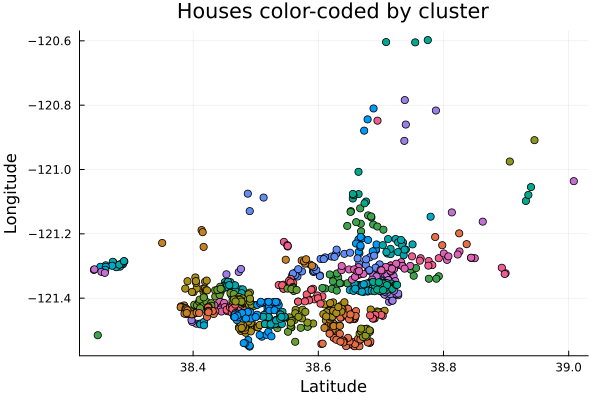

In [64]:
clusters_figure = plot(legend = false)
for i = 1:k
    clustered_houses = df[df[!,:cluster].== i,:]
    xvals = clustered_houses[!,:latitude]
    yvals = clustered_houses[!,:longitude]
    scatter!(clusters_figure,xvals,yvals,markersize=4)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by cluster")
display(clusters_figure)

Построим график, раскрасив кластеры по почтовому индексу:

In [65]:
unique_zips = unique(filter_houses[!,:zip])

66-element Vector{Int64}:
 95838
 95823
 95815
 95824
 95841
 95842
 95820
 95670
 95673
 95822
 95621
 95833
 95660
     ⋮
 95650
 95821
 95603
 95762
 95677
 95623
 95663
 95746
 95619
 95614
 95690
 95691

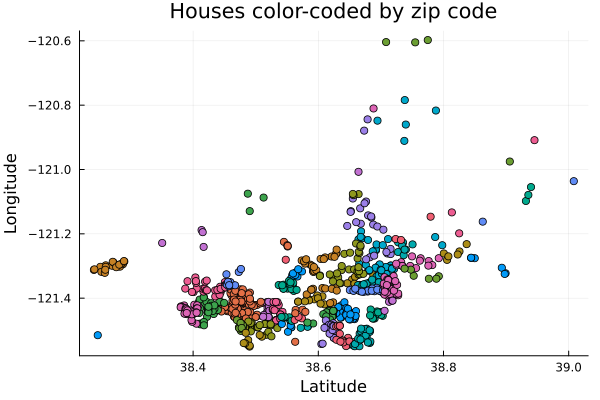

In [66]:
zips_figure = plot(legend = false)
for uzip in unique_zips
    subs = filter_houses[filter_houses[!,:zip].==uzip,:]
    x = subs[!,:latitude]
    y = subs[!,:longitude]
    scatter!(zips_figure,x,y)
end
xlabel!("Latitude")
ylabel!("Longitude")
title!("Houses color-coded by zip code")
display(zips_figure)

#### 7.2.2.2. Кластеризация данных. Метод k ближайших соседей

Данный метод заключается в отнесении объекта к тому из известных классов, который является наиболее распространённым среди $k$ соседей данного элемента. В случае
использования метода для регрессии, объекту присваивается среднее значение по $k$ ближайшим к нему объектам.

Рассмотрим использование метода $𝑘$ ближайших соседей на примере того же файла с данными об объектах недвижимости в Сакраменто.

Подключим необходимый пакет:

In [67]:
# Подключение пакета NearestNeighbors:
import Pkg
Pkg.add("NearestNeighbors")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [68]:
using NearestNeighbors

Найдём k-среднее одного из объектов недвижимости:

In [69]:
knearest = 10
id = 70
point = X[:,id]

2-element Vector{Float64}:
   38.44004
 -121.421012

Определим ближайших соседей:

In [70]:
# Поиск ближайших соседей:
kdtree = KDTree(X)

KDTree{StaticArraysCore.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 814
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

In [71]:
idxs, dists = knn(kdtree, point, knearest, true)

([70, 764, 196, 125, 557, 368, 415, 92, 112, 683], [0.0, 0.006264891539364138, 0.00825320259050462, 0.008473585132630057, 0.009164073548370188, 0.009405065124697706, 0.009921759722950759, 0.009941028618812013, 0.010332637707777167, 0.011168993911721985])

Отобразим на графике соседей выбранного объекта недвижимости:

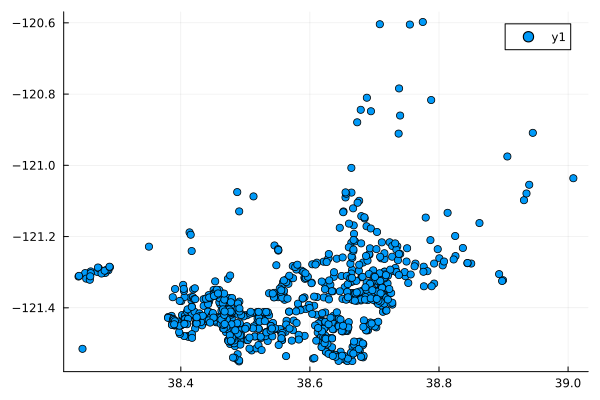

In [72]:
# Все объекты недвижимости:
x = filter_houses[!,:latitude];
y = filter_houses[!,:longitude];
scatter(x,y)

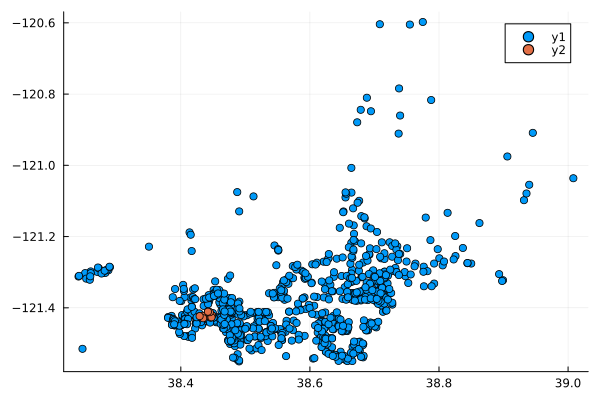

In [73]:
# Соседи:
x = filter_houses[idxs,:latitude];
y = filter_houses[idxs,:longitude];
scatter!(x,y)

Используя индексы idxs и функцию `:city` для индексации в DataFrame
filter_houses, можно определить районы соседних домов:

In [74]:
# Фильтрация по районам соседних домов:
cities = filter_houses[idxs,:city]

10-element PooledArrays.PooledVector{String15, UInt32, Vector{UInt32}}:
 "SACRAMENTO"
 "ELK GROVE"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "SACRAMENTO"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"
 "ELK GROVE"

#### 7.2.2.3. Обработка данных. Метод главных компонент

Метод главных компонент (Principal Components Analysis, PCA) позволяет уменьшить
размерность данных, потеряв наименьшее количество полезной информации. Метод
имеет широкое применение в различных областях знаний, например, при визуализации
данных, компрессии изображений, в эконометрике, некоторых гуманитарных предметных областях, например, в социологии или в политологии.

На примере с данными о недвижимости попробуем уменьшить размеры данных о цене
и площади из набора данных домов:

In [75]:
# Фрейм с указанием площади и цены недвижимости:
F = filter_houses[!, [:sq__ft,:price]]

Row,sq__ft,price
,Int64,Int64
1,836,59222
2,1167,68212
3,796,68880
4,852,69307
5,797,81900
6,1122,89921
7,1104,90895
8,1177,91002
9,941,94905


In [76]:
# Конвертация данных в массив:
F = hcat(F[!, :sq__ft], F[!, :price])

814×2 Matrix{Int64}:
  836   59222
 1167   68212
  796   68880
  852   69307
  797   81900
 1122   89921
 1104   90895
 1177   91002
  941   94905
 1146   98937
  909  100309
 1289  106250
  871  106852
    ⋮  
  960  224252
 1456  225000
 1450  228000
 1358  229027
 1329  229500
 1715  230000
 1262  230000
 2280  232425
 1477  234000
 1216  235000
 1685  235301
 1362  235738

In [77]:
F = F'

2×814 adjoint(::Matrix{Int64}) with eltype Int64:
   836   1167    796    852    797   1122  …    1477    1216    1685    1362
 59222  68212  68880  69307  81900  89921     234000  235000  235301  235738

Далее подключим пакет MultivariateStats, чтобы использовать метод главных компонент:

In [78]:
# Подключение пакета MultivariateStats:
import Pkg
Pkg.add("MultivariateStats")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [79]:
using MultivariateStats

Далее используем специальную функцию fit и приведём имеющийся набор данных
к распределению, к которому можно применить метод главных компонент (PCA):

In [80]:
# Приведение типов данных к распределению для PCA:
M = fit(PCA, F)

PCA(indim = 2, outdim = 1, principalratio = 0.9999840784692097)

Pattern matrix (unstandardized loadings):
──────────────
           PC1
──────────────
1  460.52
2    1.19826e5
──────────────

Importance of components:
─────────────────────────────────────
                                  PC1
─────────────────────────────────────
SS Loadings (Eigenvalues)  1.43584e10
Variance explained         0.999984
Cumulative variance        0.999984
Proportion explained       1.0
Cumulative proportion      1.0
─────────────────────────────────────

In [81]:
y = MultivariateStats.transform(M, F)

1×814 Matrix{Float64}:
 -170228.0  -1.61237e5  -1.6057e5  …  4551.16  5550.15  5852.95  6288.7

Далее воспользуемся функцией reconstruct, чтобы выделить данные с главными
компонентами в отдельную переменную Xr, значения которой в последствии можно
вывести на графике:

In [82]:
# Выделение значений главных компонент в отдельную переменную:
Xr = reconstruct(M, y)

2×814 Matrix{Float64}:
   936.922    971.477    974.039    975.681  …  1613.64         1615.32
 59221.6    68212.8    68879.3    69306.5          2.35301e5  235737.0

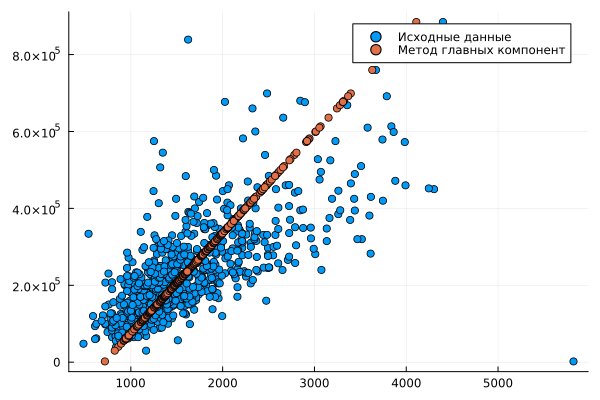

In [83]:
# Построение графика с выделением главных компонент:
scatter(F[1,:],F[2,:], label = "Исходные данные")
scatter!(Xr[1,:],Xr[2,:], label="Метод главных компонент")

#### 7.2.2.4. Обработка данных. Линейная регрессия

Регрессионный анализ представляет собой набор статистических методов исследования влияния одной или нескольких независимых переменных (регрессоров) на
зависимую (критериальная) переменную. Терминология зависимых и независимых
переменных отражает лишь математическую зависимость переменных, а не причинно-следственные отношения.

Наиболее распространённый вид регрессионного анализа — линейная регрессия, когда
находят линейную функцию, которая согласно определённым математическим критериям наиболее соответствует данным.

Зададим случайный набор данных (можно использовать и полученные экспериментальным путём какие-то данные). Попробуем найти для данных лучшее соответствие:

In [84]:
xvals = repeat(1:0.5:10,inner=2)

38-element Vector{Float64}:
  1.0
  1.0
  1.5
  1.5
  2.0
  2.0
  2.5
  2.5
  3.0
  3.0
  3.5
  3.5
  4.0
  ⋮
  7.5
  7.5
  8.0
  8.0
  8.5
  8.5
  9.0
  9.0
  9.5
  9.5
 10.0
 10.0

In [85]:
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1

38-element Vector{Float64}:
  4.475428220802369
  3.8529119423789453
  3.812979062979294
  4.257918530414371
  5.554667662635916
  4.478406496324647
  5.891331062997336
  6.4115039160693605
  6.860294451296202
  6.588753272340719
  7.310397057275473
  7.145103095640115
  6.579238608075951
  ⋮
 10.357897033533085
 11.356609862704843
 11.105631339297327
 11.811073334697003
 11.7558348578751
 12.056576539797303
 11.319181403956428
 12.822384901663371
 12.90427787474967
 12.557899125123127
 13.115754495759106
 13.91419177047369

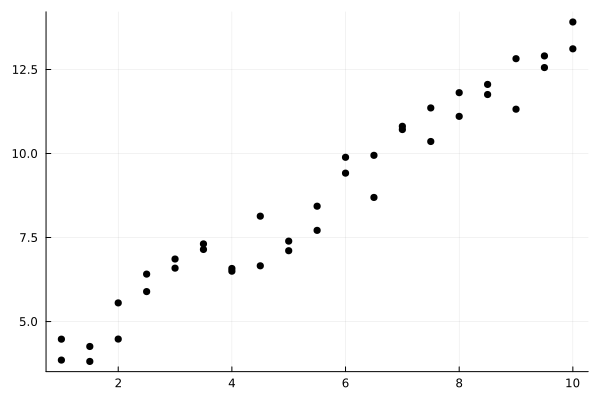

In [86]:
scatter(xvals,yvals,color=:black,leg=false)

Определим функцию линейной регрессии:

In [87]:
function find_best_fit(xvals,yvals)
    meany = mean(yvals)
    meanx = mean(xvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
end

find_best_fit (generic function with 1 method)

Применим функцию линейной регрессии для построения соответствующего графика
значений:

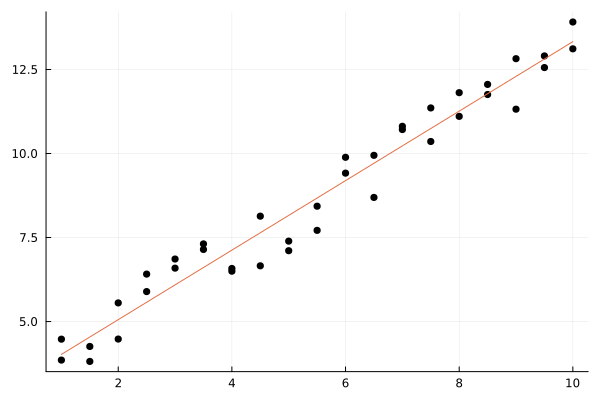

In [88]:
a,b = find_best_fit(xvals,yvals)
ynew = a * xvals .+ b
plot!(xvals,ynew)

Сгенерируем больший набор данных:

In [89]:
xvals = 1:100000;
xvals = repeat(xvals,inner=3);
yvals = 3 .+ xvals + 2*rand(length(xvals)) .- 1;
@show size(xvals)
@show size(yvals)

size(xvals) = (300000,)
size(yvals) = (300000,)


(300000,)

Определим, сколько времени потребуется, чтобы найти соответствие этим данным:

In [90]:
@time a,b = find_best_fit(xvals,yvals)

  0.050979 seconds (46.28 k allocations: 2.320 MiB, 97.32% compilation time)


(0.9999999342549499, 3.002615140969283)

Для сравнения реализуем подобный код на языке Python:

In [91]:
import Pkg
Pkg.add("PyCall")
Pkg.add("Conda")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [92]:
using PyCall
using Conda

In [93]:
py"""
import numpy
def find_best_fit_python(xvals,yvals):
    meanx = numpy.mean(xvals)
    meany = numpy.mean(yvals)
    stdx = numpy.std(xvals)
    stdy = numpy.std(yvals)
    r = numpy.corrcoef(xvals,yvals)[0][1]
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
"""

In [94]:
find_best_fit_python = py"find_best_fit_python"

PyObject <function find_best_fit_python at 0x000002406E074820>

In [95]:
xpy = PyObject(xvals)
ypy = PyObject(yvals)
@time a,b = find_best_fit_python(xpy,ypy)

  0.182749 seconds (168.23 k allocations: 9.364 MiB, 56.24% compilation time)


(0.9999999342549496, 3.002615140991111)

Используем пакет для анализа производительности, чтобы провести сравнение:

In [96]:
import Pkg
Pkg.add("BenchmarkTools")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [97]:
using BenchmarkTools

In [98]:
@btime a,b = find_best_fit_python(xvals,yvals)

  6.987 ms (27 allocations: 864 bytes)


(0.9999999342549496, 3.002615140991111)

In [99]:
@btime a,b = find_best_fit(xvals,yvals)

  976.700 μs (1 allocation: 32 bytes)


(0.9999999342549499, 3.002615140969283)

## Самостоятельное задание

### 7.4.1. Кластеризация

Загрузите
`using RDatasets`

`iris = dataset("datasets", "iris")`

Используйте `Clustering.jl` для кластеризации на основе k-средних. Сделайте точечную диаграмму полученных кластеров

In [100]:
using RDatasets

In [101]:
iris = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [102]:
F1 = iris[!, [:SepalLength, :PetalLength]]

Row,SepalLength,PetalLength
,Float64,Float64
1,5.1,1.4
2,4.9,1.4
3,4.7,1.3
4,4.6,1.5
5,5.0,1.4
6,5.4,1.7
7,4.6,1.4
8,5.0,1.5
9,4.4,1.4


In [103]:
F1 = hcat(F1[!, :SepalLength], F1[!, :PetalLength])'

2×150 adjoint(::Matrix{Float64}) with eltype Float64:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5     5.9  5.7  5.2  5.0  5.2  5.4  5.1

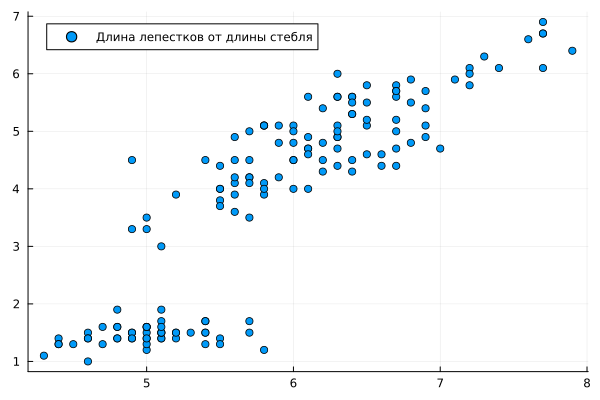

In [104]:
scatter(F1[1,:],F1[2,:], label = "Длина лепестков от длины стебля")

In [105]:
F2 = iris[!, [:SepalWidth, :PetalWidth]]

Row,SepalWidth,PetalWidth
,Float64,Float64
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2
6,3.9,0.4
7,3.4,0.3
8,3.4,0.2
9,2.9,0.2


In [106]:
F2 = hcat(F2[!, :SepalWidth], F2[!, :PetalWidth])'

2×150 adjoint(::Matrix{Float64}) with eltype Float64:
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4  …  3.2  3.3  3.0  2.5  3.0  3.4  3.0
 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8

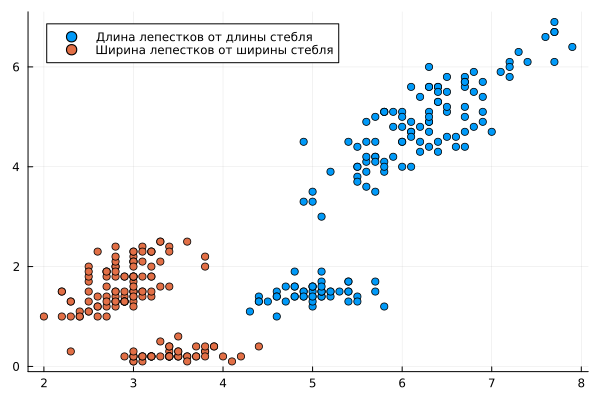

In [107]:
scatter!(F2[1,:],F2[2,:], label = "Ширина лепестков от ширины стебля")

In [108]:
# Задание количества кластеров:
k = length(unique(iris[!,:Species]))

3

In [109]:
# Определение k-среднего:
C1 = kmeans(F1, k)

KmeansResult{Matrix{Float64}, Float64, Int64}([5.874137931034483 6.839024390243902 5.007843137254902; 4.393103448275863 5.678048780487804 1.4921568627450983], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 1, 2, 2, 1], [0.016985774702035883, 0.02012302960400092, 0.13169165705497932, 0.16639753940791735, 0.008554402153016838, 0.1969857747020427, 0.1748289119569364, 0.00012302960399779295, 0.37796616685889717, 0.011691657054981874  …  0.0254193932183, 0.33785841760854396, 0.5051991676575369, 0.05078524687684194, 0.019809637120715706, 0.24785841760854055, 0.5496819262782395, 0.34346817370612825, 0.48566329565733213, 0.5003715814506506], [58, 41, 51], [58, 41, 51], 53.80997864410625, 7, true)

In [110]:
C2 = kmeans(F2, k)

KmeansResult{Matrix{Float64}, Float64, Int64}([3.4510204081632656 3.041666666666666 2.707547169811321; 0.24489795918367335 2.052083333333333 1.3094339622641509], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0.00441482715535102, 0.20543523531861752, 0.06502707205331149, 0.1252311536859665, 0.024210745522697863, 0.22563931695127337, 0.005639316951270956, 0.0046189087880037505, 0.3056393169512681, 0.1442107455227024  …  0.12444878472222243, 0.06486545138888644, 0.13986545138888573, 0.08653211805555472, 0.26736545138889056, 0.06319878472222129, 0.31653211805555515, 0.004448784722221433, 0.18986545138888644, 0.06528211805555628], [49, 48, 53], [49, 48, 53], 20.602395953664466, 7, true)

In [111]:
# Формирование фрейма данных:
df1 = DataFrame(cluster = C1.assignments, Species = iris[!, :Species], 
    SepalLength = iris[!,:SepalLength],
    SepalWidth = iris[!, :SepalWidth],
    PetalLength = iris[!,:PetalLength],
    PetalWidth = iris[!,:PetalWidth])

Row,cluster,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
,Int64,Cat…,Float64,Float64,Float64,Float64
1,3,setosa,5.1,3.5,1.4,0.2
2,3,setosa,4.9,3.0,1.4,0.2
3,3,setosa,4.7,3.2,1.3,0.2
4,3,setosa,4.6,3.1,1.5,0.2
5,3,setosa,5.0,3.6,1.4,0.2
6,3,setosa,5.4,3.9,1.7,0.4
7,3,setosa,4.6,3.4,1.4,0.3
8,3,setosa,5.0,3.4,1.5,0.2
9,3,setosa,4.4,2.9,1.4,0.2


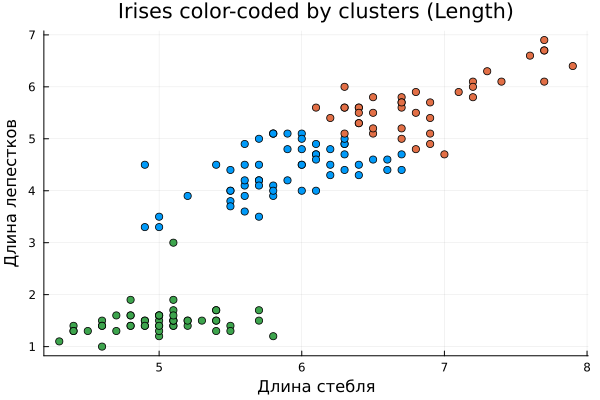

In [112]:
clusters_figure1 = plot(legend = false)
for i = 1:k
    clustered_irises = df1[df1[!,:cluster].== i,:]
    xvals = clustered_irises[!,:SepalLength]
    yvals = clustered_irises[!,:PetalLength]
    scatter!(clusters_figure1, xvals, yvals, markersize=4)
end
xlabel!("Длина стебля")
ylabel!("Длина лепестков")
title!("Irises color-coded by clusters (Length)")
display(clusters_figure1)

In [113]:
unique_species = unique(iris[!, :Species])

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

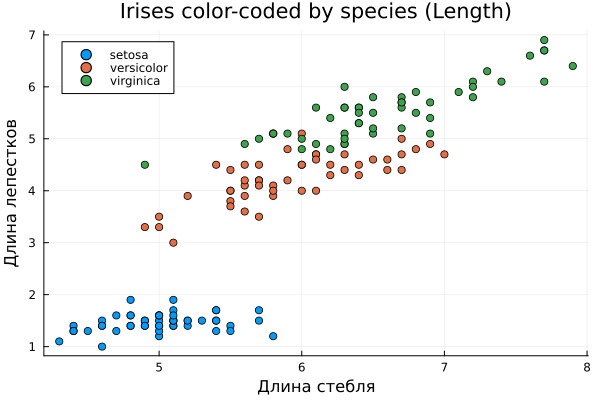

In [114]:
species_figure1 = plot(legend = true)
for spec in unique_species
    subs = iris[iris[!,:Species].==spec,:]
    x = subs[!,:SepalLength]
    y = subs[!,:PetalLength]
    scatter!(species_figure1, x, y, label = "$(spec)")
end
xlabel!("Длина стебля")
ylabel!("Длина лепестков")
title!("Irises color-coded by species (Length)")
display(species_figure1)

In [115]:
# Формирование фрейма данных:
df2 = DataFrame(cluster = C2.assignments, Species = iris[!, :Species], 
    SepalLength = iris[!,:SepalLength],
    SepalWidth = iris[!, :SepalWidth],
    PetalLength = iris[!,:PetalLength],
    PetalWidth = iris[!,:PetalWidth])

Row,cluster,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
,Int64,Cat…,Float64,Float64,Float64,Float64
1,1,setosa,5.1,3.5,1.4,0.2
2,1,setosa,4.9,3.0,1.4,0.2
3,1,setosa,4.7,3.2,1.3,0.2
4,1,setosa,4.6,3.1,1.5,0.2
5,1,setosa,5.0,3.6,1.4,0.2
6,1,setosa,5.4,3.9,1.7,0.4
7,1,setosa,4.6,3.4,1.4,0.3
8,1,setosa,5.0,3.4,1.5,0.2
9,1,setosa,4.4,2.9,1.4,0.2


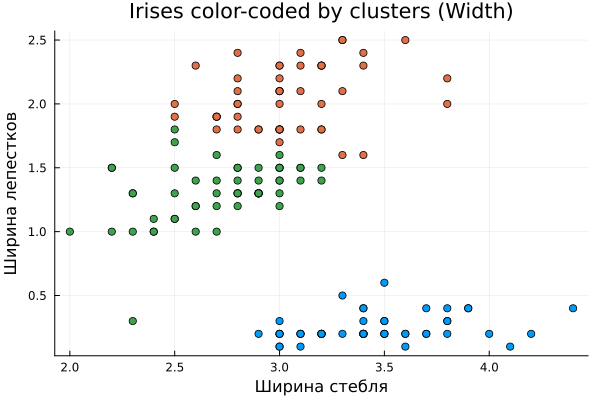

In [116]:
clusters_figure2 = plot(legend = false)
for i = 1:k
    clustered_irises = df2[df2[!,:cluster].== i,:]
    xvals = clustered_irises[!,:SepalWidth]
    yvals = clustered_irises[!,:PetalWidth]
    scatter!(clusters_figure2, xvals, yvals, markersize=4)
end
xlabel!("Ширина стебля")
ylabel!("Ширина лепестков")
title!("Irises color-coded by clusters (Width)")
display(clusters_figure2)

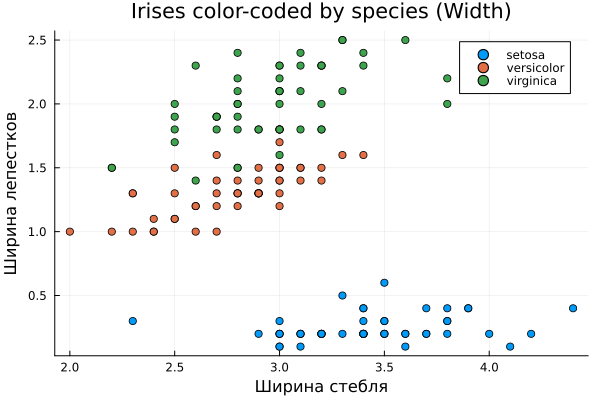

In [117]:
species_figure2 = plot(legend = true)
for spec in unique_species
    subs = iris[iris[!,:Species].==spec,:]
    x = subs[!,:SepalWidth]
    y = subs[!,:PetalWidth]
    scatter!(species_figure2, x, y, label = "$(spec)")
end
xlabel!("Ширина стебля")
ylabel!("Ширина лепестков")
title!("Irises color-coded by species (Width)")
display(species_figure2)

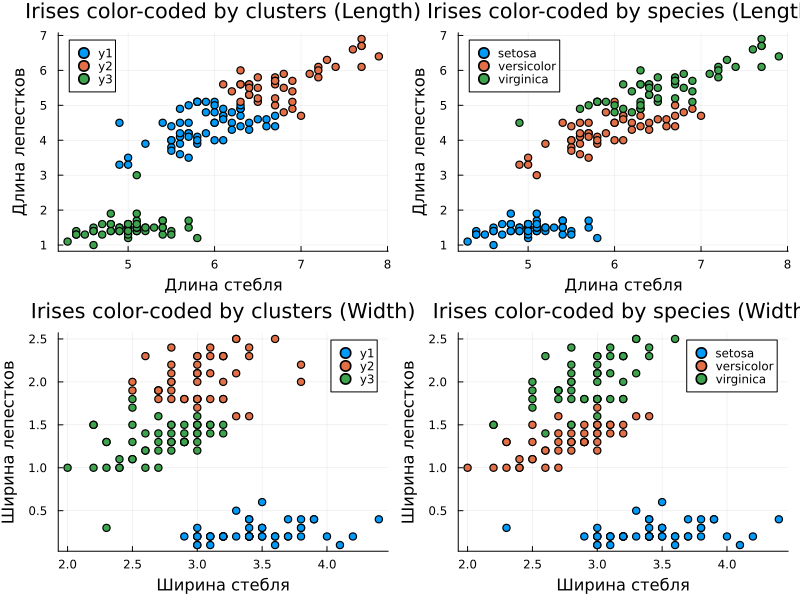

In [118]:
plot(
    clusters_figure1,species_figure1,clusters_figure2,species_figure2,
    layout=(2,2),
    legend=true,
    size=(800,600),
)

### 7.4.2. Регрессия (метод наименьших квадратов в случае линейной регрессии)

**Часть 1** Пусть регрессионная зависимость является линейной. Матрица наблюдений
факторов $𝑋$ имеет размерность $𝑁 × 3$ randn(N, 3), массив результатов $𝑁 × 1$, регрессионная зависимость является линейной. Найдите МНК-оценку для линейной модели.

– Сравните свои результаты с результатами использования llsq из `MultivariateStats.jl` (просмотрите документацию).

– Сравните свои результаты с результатами использования регулярной регрессии наименьших квадратов из `GLM.jl`.

*Подсказка.* Cоздайте матрицу данных X2, которая добавляет столбец единиц в начало матрицы данных, и решите систему линейных уравнений. Объясните с помощью теоретических выкладок.

**Часть 2** Найдите линию регрессии, используя данные $(𝑋, 𝑦)$. Постройте график $(𝑋, 𝑦)$, используя точечный график. Добавьте линию регрессии, используя `abline!`. Добавьте
заголовок «График регрессии» и подпишите оси $𝑥$ и $𝑦$.

`# Часть 1

X = randn(1000, 3)

a0 = rand(3)

y = X * a0 + 0.1 * randn(1000);`

`# Часть 2

X = rand(100);

y = 2X + 0.1 * randn(100);`

#### Часть 1

In [163]:
X = randn(1000, 3)
a0 = rand(3)
y = X * a0 + 0.1 * randn(1000);

In [202]:
function find_best_fit(xvals,yvals)
    meanx = mean(xvals, dims = 1)
    meany = mean(yvals)
    stdx = std(xvals, dims = 1)
    stdy = std(yvals)
    r = cor(xvals, yvals, dims = 1)
    a = [0., 0., 0.]
    a[1] = r[1]*stdy/stdx[1]
    a[2] = r[2]*stdy/stdx[2]
    a[3] = r[3]*stdy/stdx[3]
    b = meany - (meanx[1]*a[1] + meanx[2]*a[2] + meanx[3]*a[3])
    return a[1], a[2], a[3], b
end

find_best_fit (generic function with 1 method)

In [203]:
a1, a2, a3, b = find_best_fit(X, y)

(0.8056844409228956, 0.3946642724238367, 0.654932085926566, -0.0018294958707968725)

In [204]:
a = llsq(X, y, bias = true)

4-element Vector{Float64}:
  0.7896160677142112
  0.46276050568303784
  0.6233463288473586
 -0.0008202220992807055

In [167]:
import Pkg
Pkg.add("GLM")

   Resolving package versions...
   Installed GLM ─────────── v1.9.0
   Installed ShiftedArrays ─ v2.0.0
   Installed StatsModels ─── v0.7.3
    Updating `C:\Users\User\.julia\environments\v1.8\Project.toml`
  [38e38edf] + GLM v1.9.0
    Updating `C:\Users\User\.julia\environments\v1.8\Manifest.toml`
  [38e38edf] + GLM v1.9.0
  [1277b4bf] + ShiftedArrays v2.0.0
  [3eaba693] + StatsModels v0.7.3
Precompiling project...
  ✓ ShiftedArrays
  ✓ StatsModels
  ✓ GLM
  3 dependencies successfully precompiled in 36 seconds. 358 already precompiled. 83 skipped during auto due to previous errors.


In [168]:
using GLM

In [169]:
data = DataFrame(y = y, x1 = X[:, 1], x2 = X[:, 2], x3 = X[:, 3]) 

Row,y,x1,x2,x3
,Float64,Float64,Float64,Float64
1,0.112826,-0.792696,0.684447,0.628825
2,1.60916,0.144226,0.635432,1.73522
3,-0.104212,1.09997,0.426474,-1.61229
4,1.58855,1.52638,-0.660282,1.16349
5,1.08055,0.916813,0.205755,0.658162
6,-1.43068,-1.6775,0.620572,-0.405418
7,-1.66325,-1.01755,0.236616,-1.34662
8,0.963618,-0.568169,0.682365,1.78743
9,-0.850657,-0.238586,-0.601545,-0.49603


In [171]:
lm(@formula(y ~ 1 + x1 + x2 + x3), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x1 + x2 + x3

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error       t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.000820222  0.0030891    -0.27    0.7907  -0.00688211  0.00524166
x1            0.789616     0.00317794  248.47    <1e-99   0.78338     0.795852
x2            0.462761     0.00301554  153.46    <1e-99   0.456843    0.468678
x3            0.623346     0.00306642  203.28    <1e-99   0.617329    0.629364
────────────────────────────────────────────────────────────────────────────────

#### Часть 2

In [146]:
X = rand(100);
y = 2*X + 0.1 * randn(100);

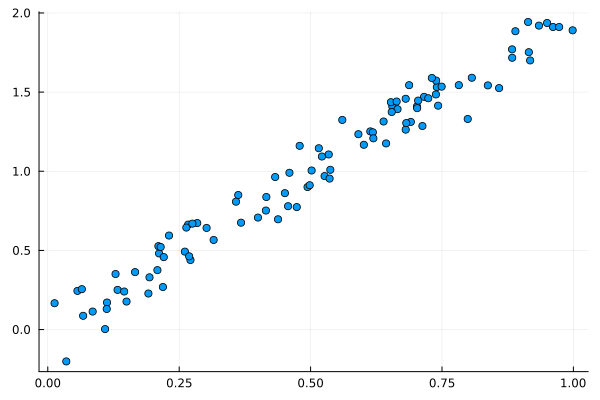

In [147]:
scatter(X, y, legend = false)

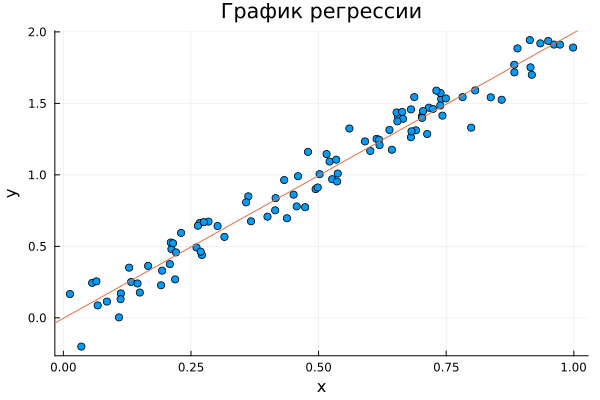

In [148]:
a,b = find_best_fit(X, y)
#ynew = a * X .+ b
Plots.abline!(a, b)
xlabel!("x")
ylabel!("y")
title!("График регрессии")

#### 7.4.3. Модель ценообразования биномиальных опционов

Постройте траекторию возможных цен на акции:

– $S$ — начальная цена акции;

– $T$ — длина биномиального дерева в годах;

– $n$ — количество периодов;

– $h = \frac{T}{n}$ — длина одного периода;

– $\sigma$ — волатильность акции;

– $r$ — годовая процентная ставка;

– $u = e^{rh + \sigma \sqrt{h}}$;

– $d = e^{rh - \sigma \sqrt{h}}$;

– $p^{*} = \frac{e^{rh} - d}{u - d}$.

a) Пусть $S = 100$, $T = 1$, $n = 10000$, $\sigma = 0.3$ и $r = 0.08$. Попробуйте построить
траекторию курса акций. Функция `rand()` генерирует случайное число от 0 до 1. Вы
можете использовать функцию построения графика из библиотеки графиков.

b) Создайте функцию `createPath(S::Float64, r::Float64, sigma::Float64, T::Float64, n::Int64)`, которая создает траекторию цены акции с учетом начальных параметров. Используйте `createPath`, чтобы создать 10
разных траекторий и построить их все на одном графике.

c) Распараллельте генерацию траектории. Можете использовать `Threads.@threads`, `pmap` и `@parallel`.

d) Пусть $S = 100$, $T = 1$, $n = 10000$, $\sigma = 0.3$ и $r = 0.08$. Попробуйте построить
траекторию курса акций. Функция `rand()` генерирует случайное число от 0 до 1. Вы
можете использовать функцию построения графика из библиотеки графиков.


#### Пункт a

In [127]:
S = 100.;
T = 1;
n = 10000;
σ = 0.3;
r = 0.08;

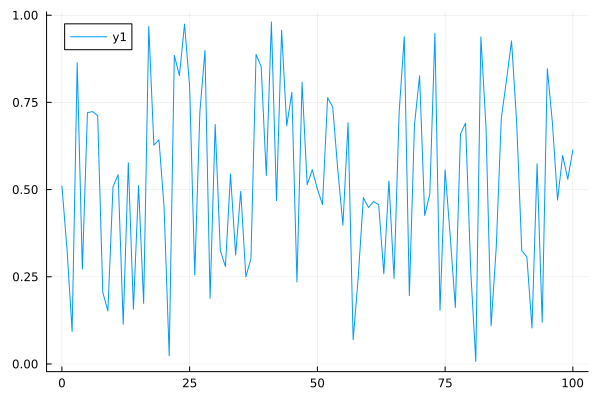

In [128]:
m = 100
x = range(0, m, length = m+1)
y = rand(m+1)
plot(x, y)

#### Пункт b

In [129]:
function createPath(S::Float64, r::Float64, sigma::Float64, T::Int64, n::Int64)
    h = T / n
    u = exp(r*h + sigma*√(h))
    d = exp(r*h - sigma*√(h))
    # Вероятность того, что цена акции поднимется
    p = (exp(r*h) - d) / (u - d)
    Price = [S]
    s = S
    for i ∈ 1:n
        q = rand()
        if q < p
            s = S*u
            push!(Price, s)
        else
            s = S*d
            push!(Price, s)
        end
    end
    return Price
end

createPath (generic function with 1 method)

In [130]:
for i ∈ 1:10
    n = 1000*i
    println("Вероятность увеличения цены акции при n = $n равна ",(exp(r*T/n) - exp(r*T/n - σ*√(T/n))) / (exp(r*T/n + σ*√(T/n)) - exp(r*T/n - σ*√(T/n))))
end

Вероятность увеличения цены акции при n = 1000 равна 0.4976283095425302
Вероятность увеличения цены акции при n = 2000 равна 0.4983229553057931
Вероятность увеличения цены акции при n = 3000 равна 0.4986306970294895
Вероятность увеличения цены акции при n = 4000 равна 0.49881414810090235
Вероятность увеличения цены акции при n = 5000 равна 0.49893934141922
Вероятность увеличения цены акции при n = 6000 равна 0.49903175537374855
Вероятность увеличения цены акции при n = 7000 равна 0.4991035795034541
Вероятность увеличения цены акции при n = 8000 равна 0.4991614752945346
Вероятность увеличения цены акции при n = 9000 равна 0.4992094312437527
Вероятность увеличения цены акции при n = 10000 равна 0.4992500005625153


Вероятность увеличения цены акции при n = 50 равна 0.48939498898613293


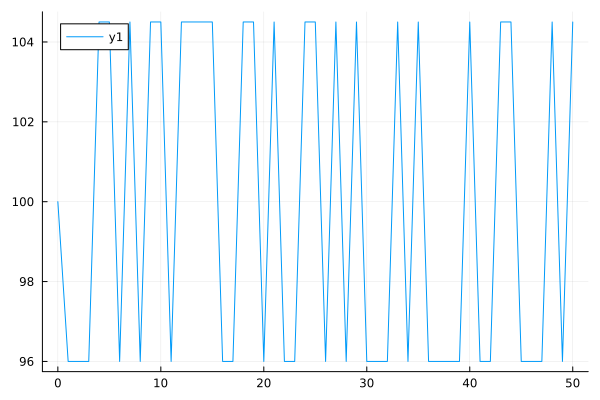

In [131]:
n = 50
x = range(0, n, length = n+1)
y = createPath(S, r, σ, T, n)
println("Вероятность увеличения цены акции при n = $n равна ",(exp(r*T/n) - exp(r*T/n - σ*√(T/n))) / (exp(r*T/n + σ*√(T/n)) - exp(r*T/n - σ*√(T/n))))
plot(x, y)

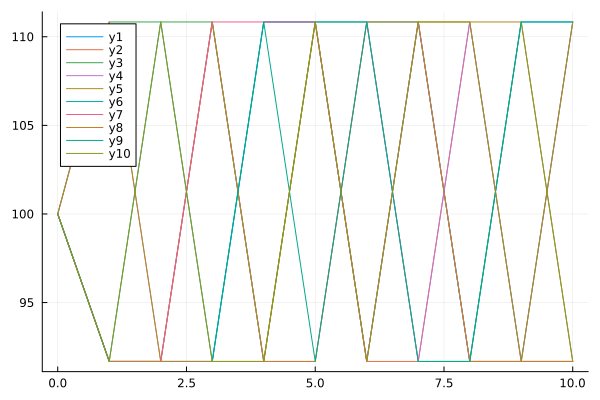

In [132]:
n = 10
x = range(0, n, length = n+1)
y = [createPath(S, r, σ, T, n) for i ∈ 1:10]
plt = plot(x, y)

#### Пункт c

In [149]:
;julia -t auto

In [150]:
Threads.nthreads()

1

In [135]:
import Pkg
Pkg.add("Distributed")

   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.8\Manifest.toml`


In [136]:
using Distributed

In [137]:
nprocs()

1

Дополнительные потоки через notebook файл не вызываются, поэтому распараллеливание сделать не удастся

Сделаем это в отдельном файле ex2_c.jl

#### Пункт d

Аналогичен пункту a